# Scraping Popular GitHub Topics

## Introducing Web Scraping: Unlocking the Data-Driven World

In the vast landscape of the internet, an incredible wealth of information lies within websites, waiting to be discovered. Imagine being able to extract this data automatically, transforming it into valuable insights, and fueling innovation. Web scraping, a powerful technique, opens the door to this data-driven universe.

- **What is Web Scraping?**

At its core, web scraping is the automated method of extracting large amounts of data from websites quickly. It's akin to a digital detective, capable of navigating the intricate web structures, gathering relevant information, and organizing it for analysis. Think of it as a bridge between the human-readable web and the data-driven computational world.

![](https://miro.medium.com/v2/resize:fit:1400/1*jDaMcAZfTHcbBHUWpS3itw.png)

- **How Does Web Scraping Work?**

Web scraping involves utilizing specialized software tools (commonly developed using programming languages like Python, JavaScript, or Ruby) to send requests to a website and then parse the HTML or other markup languages of the web pages. By understanding the structure of the web pages and employing techniques like CSS selectors or XPath, web scrapers can precisely target and extract the required data.

- **Ethics and Responsibility in Web Scraping**

While web scraping offers incredible potential, it is essential to use this technique responsibly and ethically. Respecting websites' terms of service, adhering to legal guidelines, and ensuring the privacy of individuals are paramount. Responsible web scraping practices preserve the integrity of the internet and foster a collaborative digital environment.

## Project Workflow
1. From GitHub's Popular Topics page, extracting all the topics.

- 3D
- Ajax
- Algorithm
- ...

2. Creating a CSV file that contains the Topic Title, Topic Description, and Topic URL.

|Topic|Description|Link|
|:------|:------|:------|
|3D     |"3D refers to the use of three-dimensional graphics, modeling, and animation in various industries."     |https://github.com//topics/3d     |
|Ajax     |Ajax is a technique for creating interactive web applications.     |https://github.com//topics/ajax     |
|Algorithm     |Algorithms are self-contained sequences that carry out a variety of tasks.     |https://github.com//topics/algorithm     |
|...     |...     |...     |

3. For each topic, creating a CSV file containing information about top the 100 repositories belonging to that respective topic.

**<center>3D.csv</center>**

|Username|Repository|Stars|Repo URL|
|:------|:------|:------|:------|
|mrdoob     |three.js     |94.9k     |https://github.com/mrdoob/three.js     |
|pmndrs     |react-three-fiber     |24k     |https://github.com/pmndrs/react-three-fiber     |
|libgdx     |libgdx     |22.1k     |https://github.com/libgdx/libgdx     |
|...     |...     |...     |...     |



#### Tools Utilized in the Project:
1. **Requests:** Python library for easy HTTP requests, ideal for web data retrieval.
2. **Selenium:** Automation framework for web interaction.
3. **BeautifulSoup:**  Python tool for parsing parsing HTML/XML, simplifying data extraction from web pages.
4. **Pandas:** Python library for converting lists to a Pandas Dataframe.

---
## <center>Let's Begin!!</center>
---

- Installing the necessary libraries.

In [ ]:
!pip install requests --upgrade --quiet
!pip install selenium --upgrade --quiet
!pip install beautifulsoup4 --upgrade --quiet
!pip install pandas --upgrade --quiet

- Importing the necessary modules.

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options
import os
import time
import requests
import pandas as pd

**Requests** is used to send HTTP request to a website and store the response object within a variable.

- We check the status code to ensure that the request to the website was successful (status code 200). It helps detect errors (such as 404 for page not found) and ensures data is scraped from valid, accessible pages, enhancing the reliability and accuracy of the scraping process.



In [2]:
url = "https://github.com/topics"
response = requests.get(url)
response.status_code

200

### Getting Information Of All Popular Topics On GitHub

- Extracting HTML tags containing the topic title.

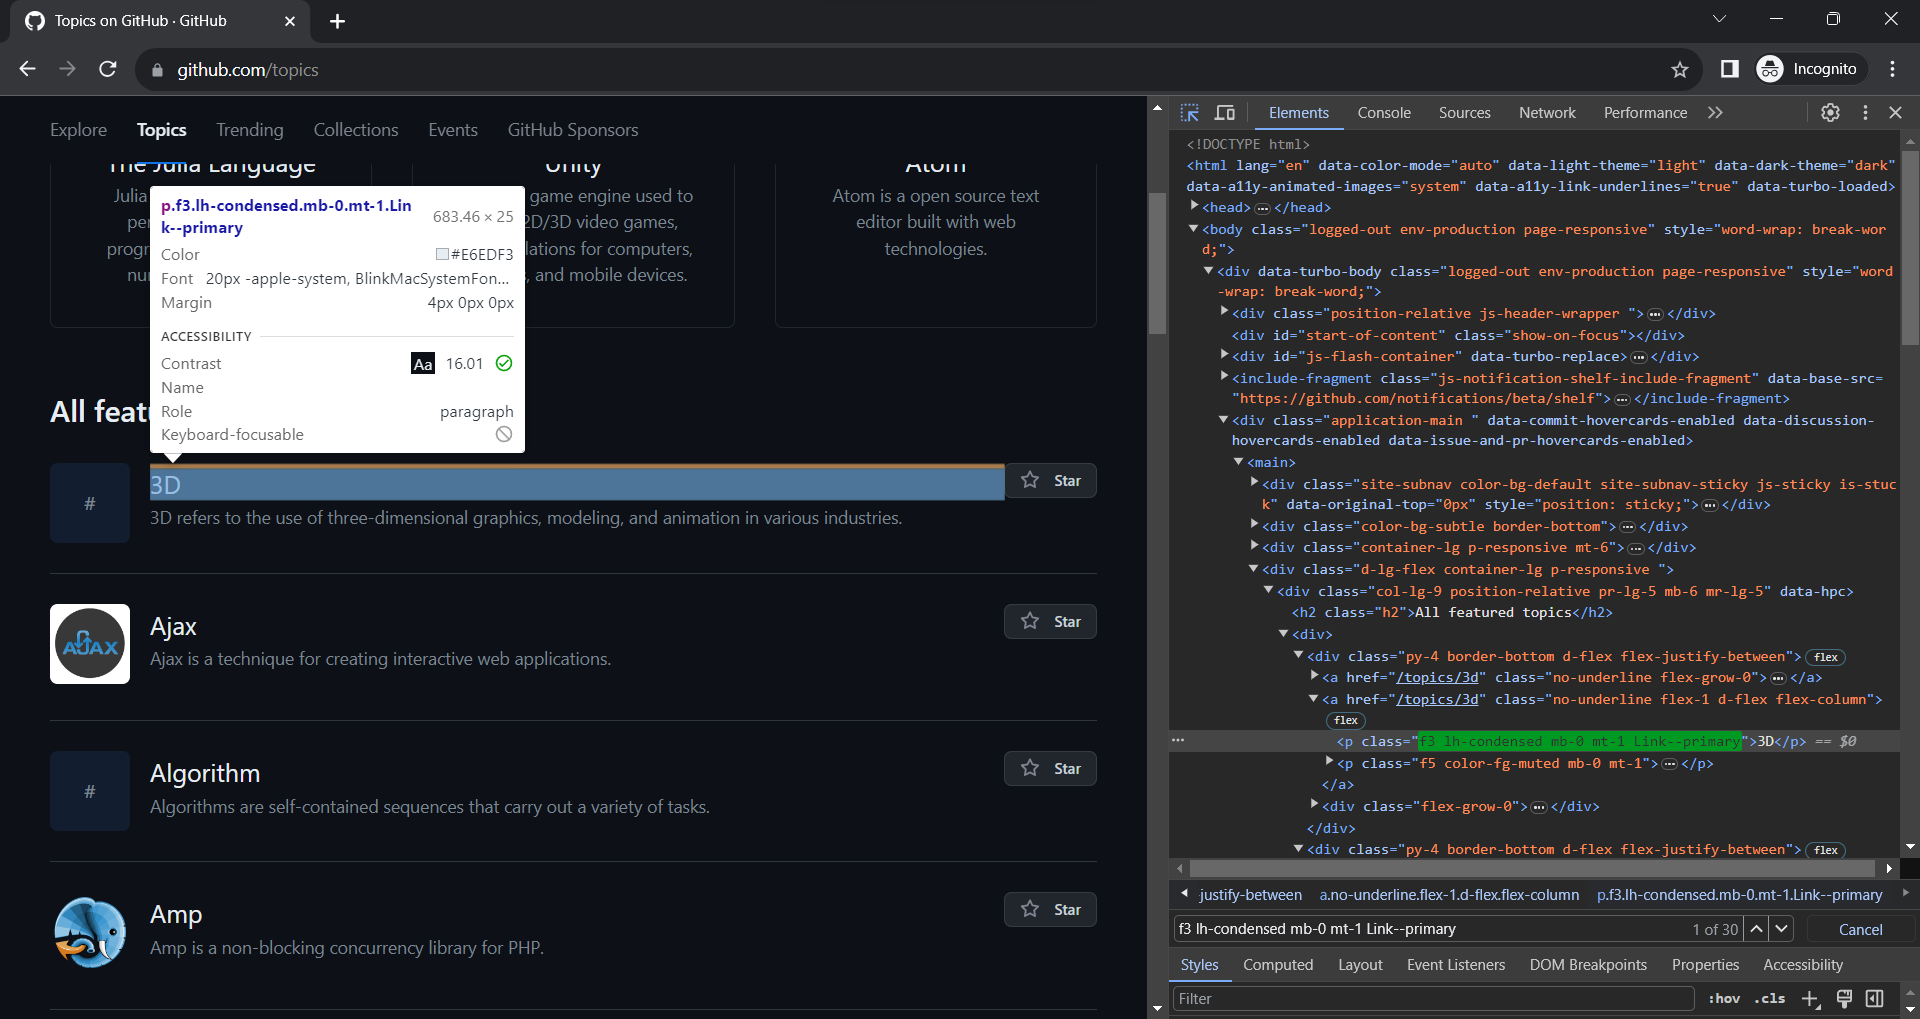

In [3]:
def get_topic_title(soup):
    
    topic_titles_tags = soup.find_all("p", class_ = "f3 lh-condensed mb-0 mt-1 Link--primary")
    topic_titles = []
    for title in topic_titles_tags: # Get topic title of the corresponding repository
        topic_titles.append(title.text.strip())
    return topic_titles

- Extracting HTML tags containing topic description.

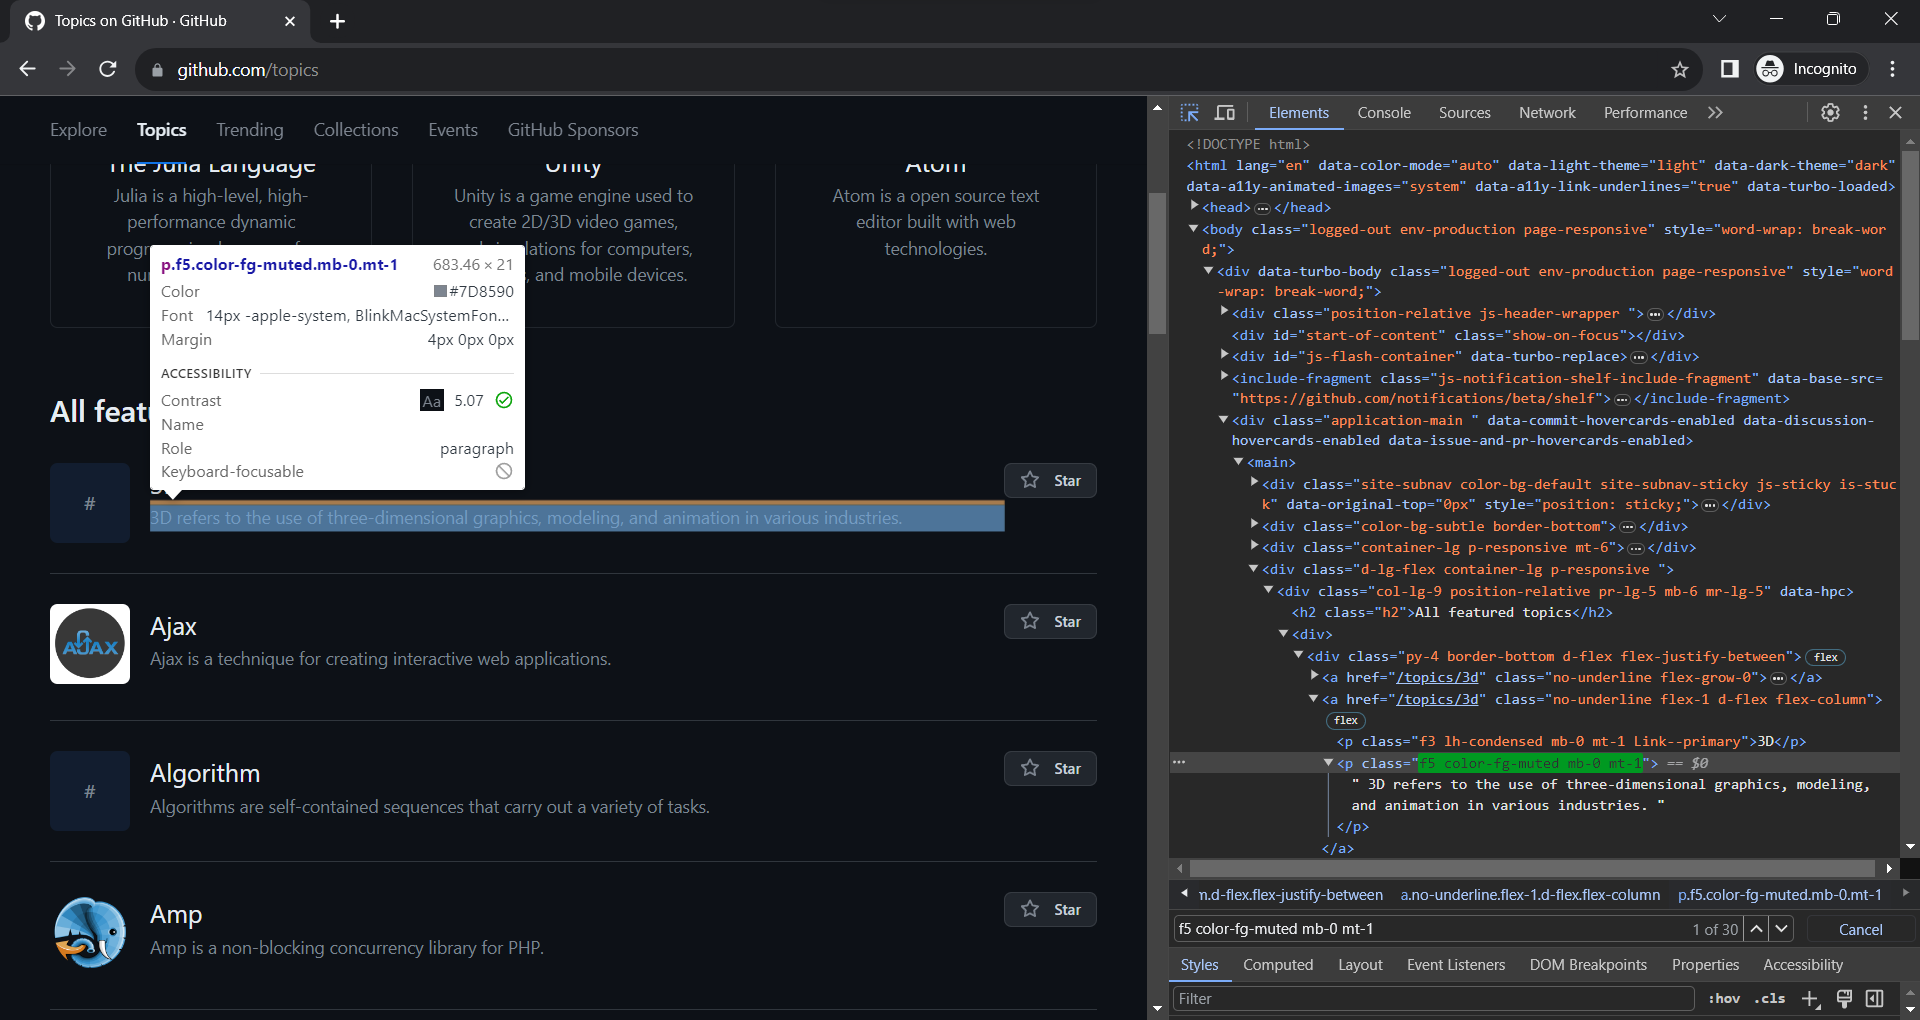

In [4]:
def get_topic_descriptions(soup):

    topic_descriptions_tags = soup.find_all("p", class_ = "f5 color-fg-muted mb-0 mt-1")
    topic_descriptions = []
    for description in topic_descriptions_tags: # Get topic description of the corresponding repository
        topic_descriptions.append(description.text.strip())
    return topic_descriptions

- Extracting HTML tags containing topic URLs.

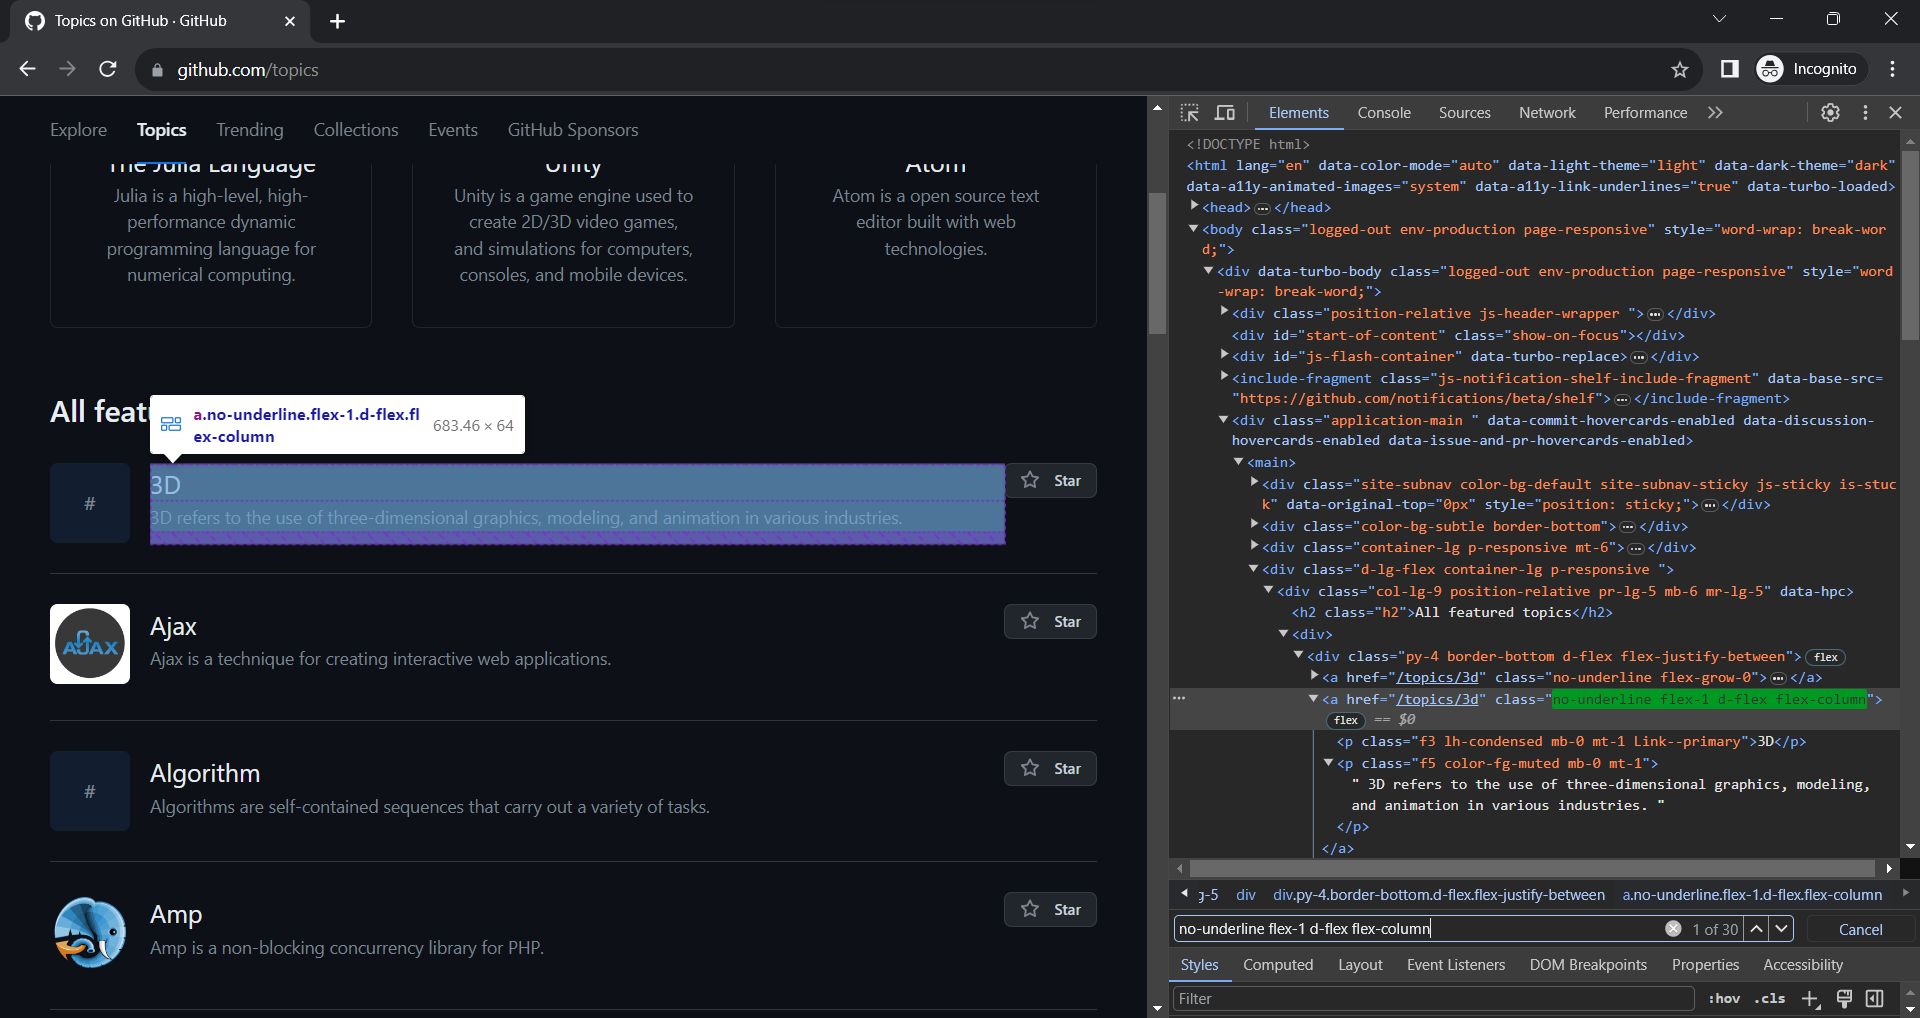

In [5]:
def get_topic_urls(soup):
    
    topic_urls_tags_info = soup.find_all("a", class_= "no-underline flex-1 d-flex flex-column")
    topic_urls = []
    base_url = 'https://github.com/'
    for url in topic_urls_tags_info: # Get topic url of the corresponding repository
        topic_urls.append(base_url + url["href"])
    return topic_urls

**Selenium** allows you to automate the process of collecting data and can save you significant time and effort. Using Selenium, you can interact with websites just like a human user and extract the data you need more efficiently.

**BeautifulSoup** is used for parsing the HTML document. Using BeautifulSoup, we extract all the tags containing information relevant to us.

**Pandas** is used for data wrangling and data manipulation purposes. We store the collected data in a CSV file using pandas.

- The **scrape_topics()** function uses Selenium to load the whole https://github.com/topics page, extract its HTML content and then uses Pandas to save information related to all the topics to a CSV file and returns a Pandas dataframe that contains the topic title, topic description and topic page URL.

In [6]:
def scrape_topics():
    
    options = Options()
    options.add_argument("--headless=new")
    driver = webdriver.Chrome(options=options)
    page_url = 'https://github.com/topics'
    driver.get(page_url)


    # Wait for the initial content to load (adjust the timeout as needed)
    
    wait = WebDriverWait(driver, 20)  # Wait up to 20 seconds


    for i in range(5):
    
        try:
            driver.find_element(By.CLASS_NAME, "ajax-pagination-btn")
            
            # Locate the "Load more" button
            load_more_button = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'ajax-pagination-btn')))
            load_more_button.click()

            print(f"Iteration {i + 1}: Loaded more content.")

            # Add a small delay before the next iteration to ensure stability
            time.sleep(2)  # Wait for 2 seconds before clicking the button again
        
        except NoSuchElementException:
            print("Exiting Successfully...")
            break
        
        html_content = driver.page_source

        
    soup = BeautifulSoup(html_content, 'html.parser')
 
    topics_dict = {'Topic': get_topic_title(soup), 'Description': get_topic_descriptions(soup), 'Link': get_topic_urls(soup)}
    
    folder_path = 'Topics_Information/'
    os.makedirs(folder_path, exist_ok=True)
    pd.DataFrame(topics_dict).to_csv(os.path.join(folder_path, f"topics_information.csv"), index=None)
    
    print(f"Successfully saved information about all the popular topics!\n")
    
    return pd.DataFrame(topics_dict)

### Getting Information Out Of A Specific Topic's URL

- Extracting HTML tags containing the username of the repository's owner.

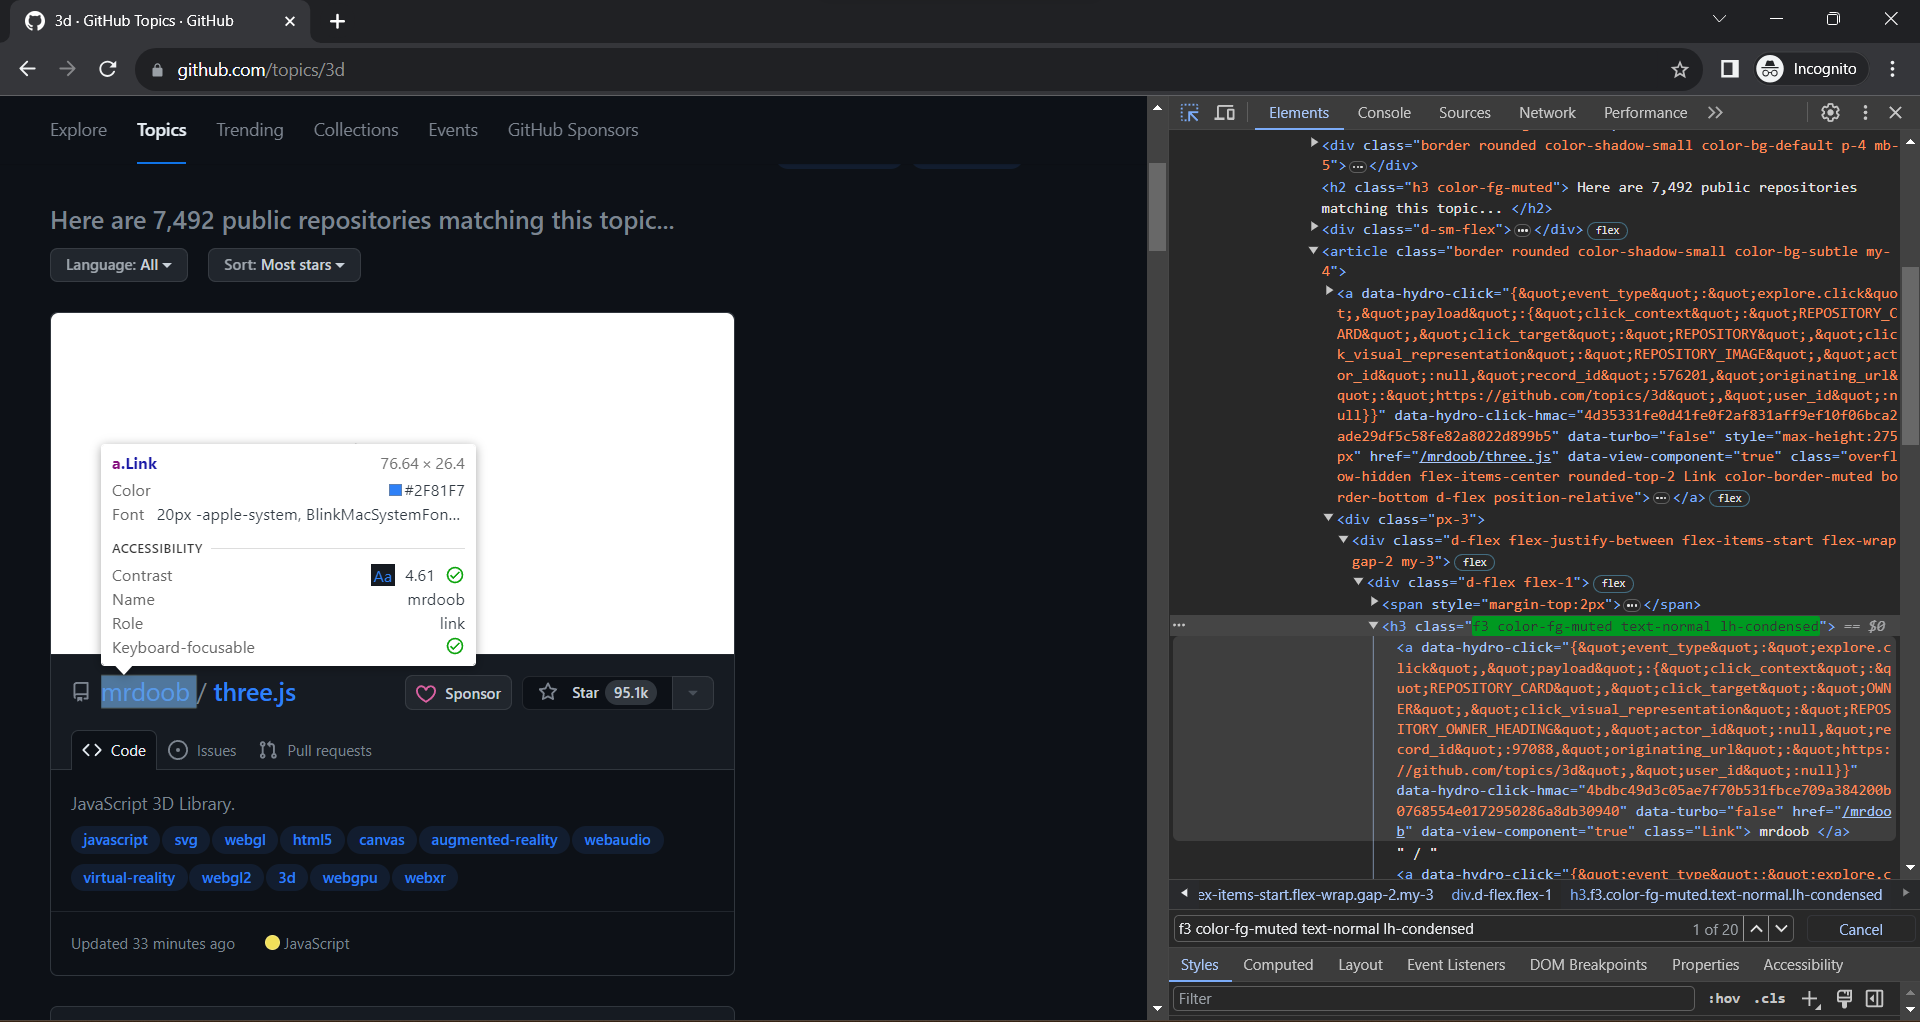

In [7]:
def get_usernames(soup):
    
    repo_tags = soup.find_all('h3', class_ = 'f3 color-fg-muted text-normal lh-condensed')
    usernames = []
    for u_name in repo_tags:
        usernames.append(u_name.find_all('a')[0].text.strip())
    return usernames

- Accessing the child element from the above extracted tags, as they contain information about the repository name.

In [8]:
def get_repo_names(soup):
    
    repo_tags = soup.find_all('h3', class_ = 'f3 color-fg-muted text-normal lh-condensed')
    repo_names = []
    for repo in repo_tags:
        repo_names.append(repo.find_all('a')[1].text.strip())
    return repo_names

- Extracting HTML tags containing stars count.

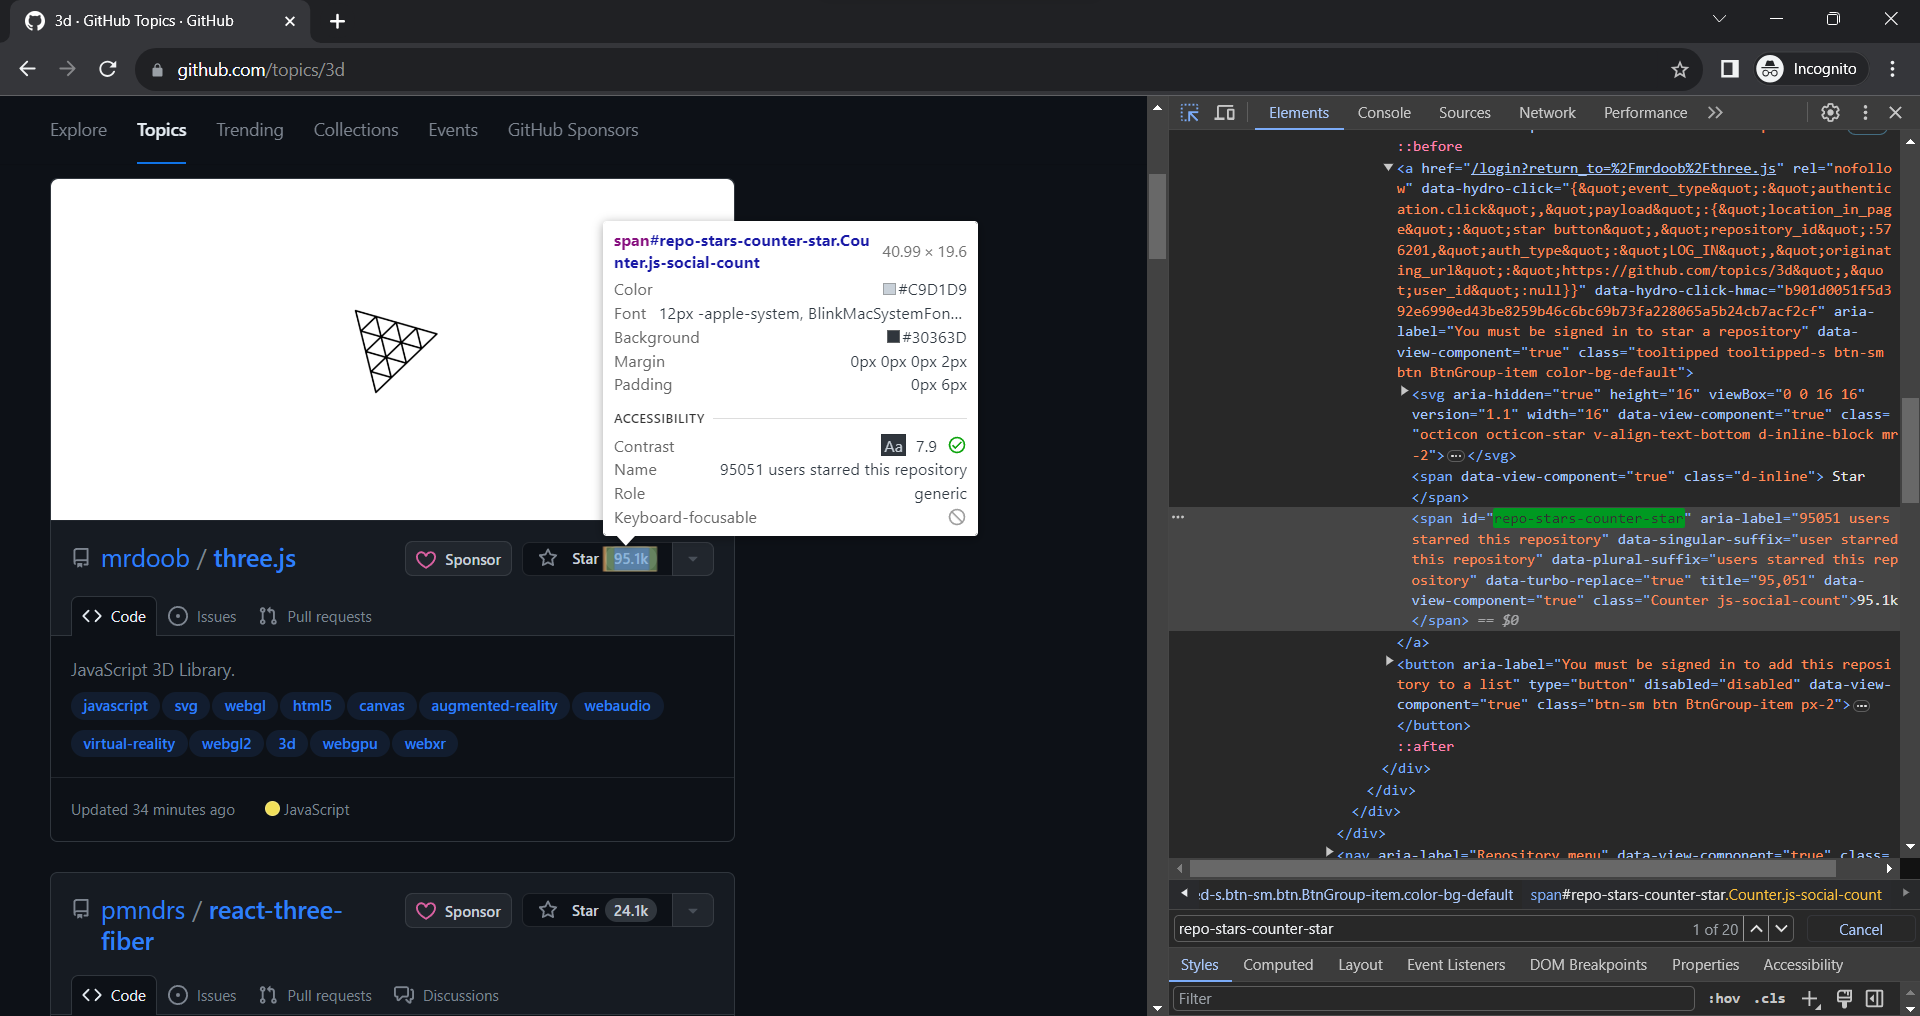

In [9]:
def get_repo_stars(soup):
    
    stars = soup.find_all('span', id = "repo-stars-counter-star")
    star_counts = []
    for star_score in stars:
        star_counts.append(star_score.text.strip())
    return star_counts

- Extracting HTML tags containing information about the repository's URL. We get the repository URL by accessing the child element of the tags extacted to collect the username of the repository's owner.

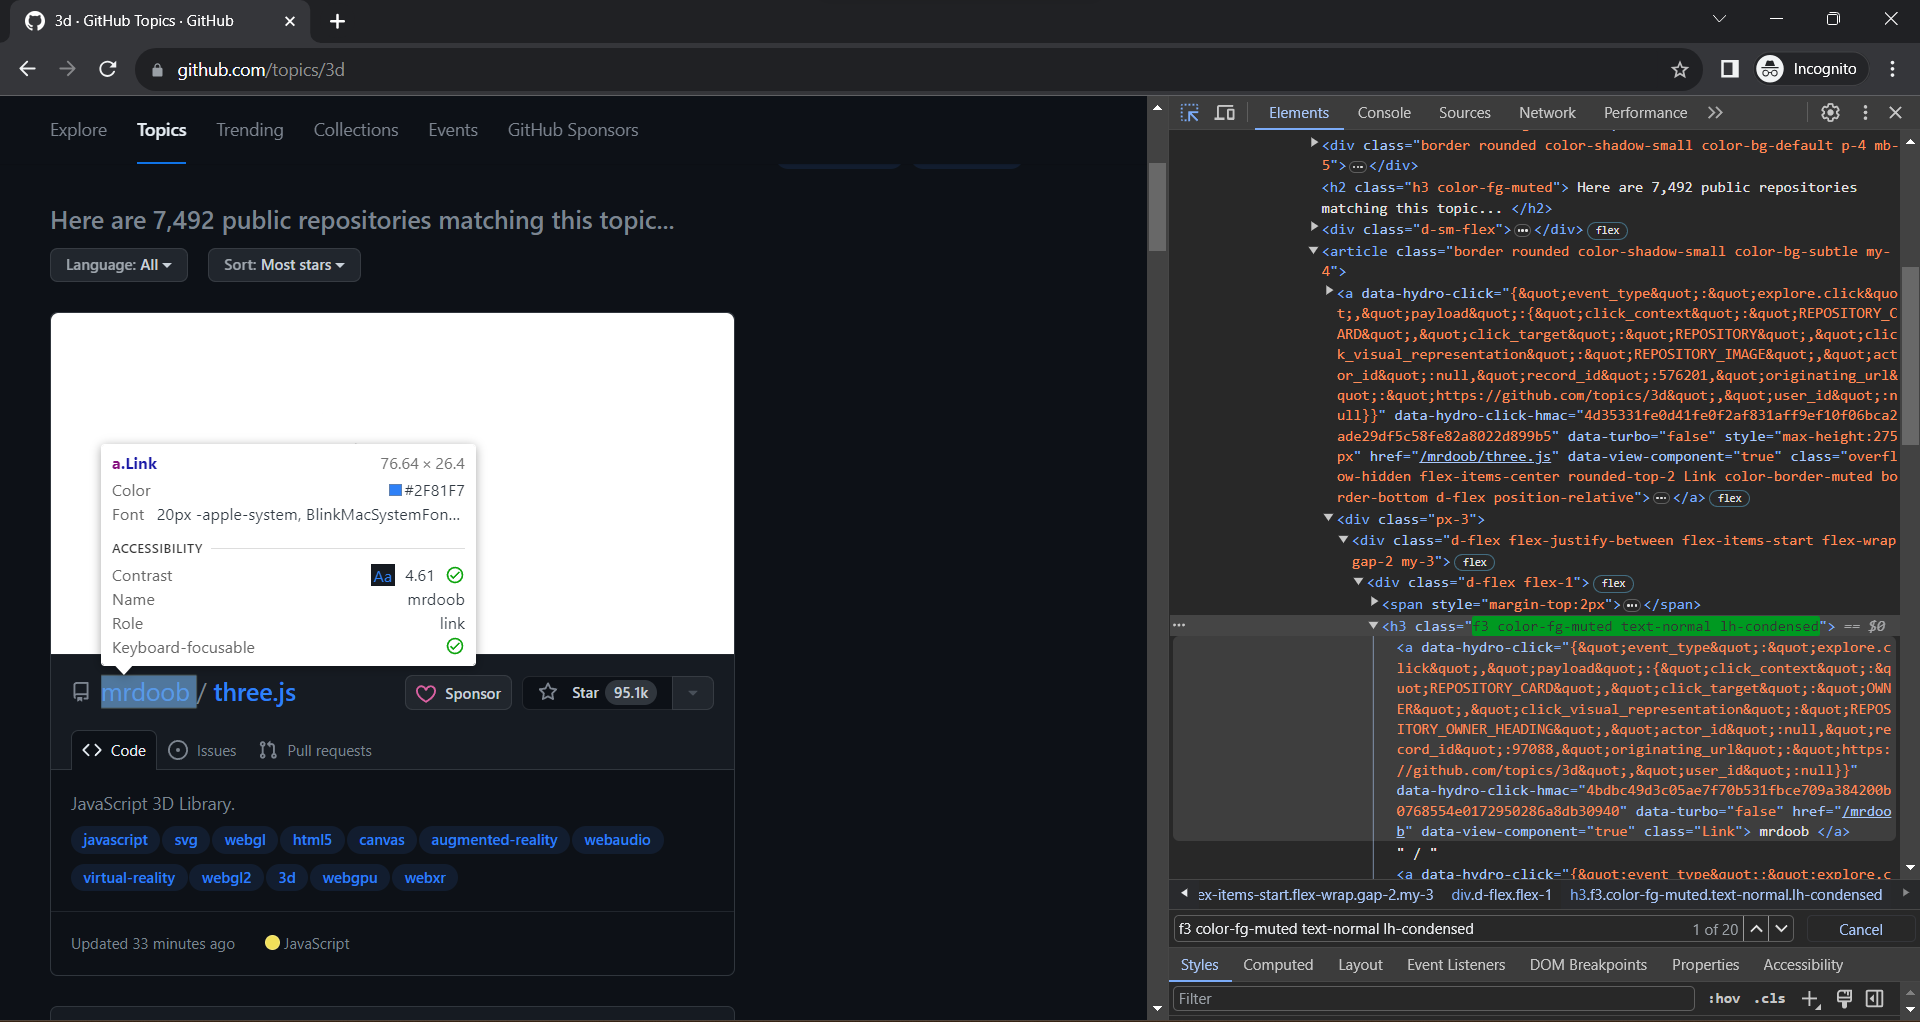

In [10]:
def get_repo_urls(soup):
    
    repo_tags = soup.find_all('h3', class_ = 'f3 color-fg-muted text-normal lh-condensed')
    repo_urls = []
    base_url = 'https://github.com'
    for rep__url in repo_tags:
        repo_urls.append(base_url + rep__url.find_all('a')[1]['href'])
    return repo_urls

- The **scrape_topic_repo()** function uses Selenium to visit the URL of each topic present in the 'topics_information.csv' file, load the whole page, extract its HTML content and then uses Pandas to return a pandas dataframe containing information about the top 100 repositories belonging to that respective topic.

In [11]:
def scrape_topic_repo(url):
    
    options = Options()
    options.add_argument("--headless=new")
    driver = webdriver.Chrome(options=options)
    topic_page_url = url
    driver.get(topic_page_url)

    
    # Wait for the initial content to load (adjust the timeout as needed)
    wait = WebDriverWait(driver, 20)  # Wait up to 10 seconds


    for i in range(4):
    
        try:
            driver.find_element(By.CLASS_NAME, "ajax-pagination-btn")
            
            # Locate the "Load more" button
            load_more_button = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'ajax-pagination-btn')))
            load_more_button.click()

            print(f"Iteration {i + 1}: Loaded more content.")

            # Add a small delay before the next iteration to ensure stability
            time.sleep(2)  # Wait for 2 seconds before clicking the button again
        
        except NoSuchElementException:
            break
        
    html_content = driver.page_source
    
    
    soup = BeautifulSoup(html_content, 'html.parser')

    repos_dict = {'Username': get_usernames(soup), 'Repository': get_repo_names(soup), 'Stars': get_repo_stars(soup), 'Repo URL': get_repo_urls(soup)}
    pd.set_option('display.max_colwidth', None)
    
    return pd.DataFrame(repos_dict)

### Let's begin to scrape top repositories from each topic.

In [14]:
topics_info_df = scrape_topics()

for index, row in topics_info_df.iterrows():
    
    url = row['Link']
    title = row['Topic']
    folder_path = 'topics/'
    os.makedirs(folder_path, exist_ok=True)
    
    topic_repos_info = scrape_topic_repo(url)
    
    print(f"Scraping the topic: {title}")
    topic_repos_info.to_csv(os.path.join(folder_path, f"{title}.csv"), index=None)
    print(f"^_____^ Successfully saved {title}.csv\n")

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Iteration 5: Loaded more content.
Successfully saved information about all the popular topics!

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: 3D
^_____^ Successfully saved 3D.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Ajax
^_____^ Successfully saved Ajax.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Algorithm
^_____^ Successfully saved Algorithm.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Amp
^_____^ 

Iteration 4: Loaded more content.
Scraping the topic: Dependency management
^_____^ Successfully saved Dependency management.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Deployment
^_____^ Successfully saved Deployment.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Django
^_____^ Successfully saved Django.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Docker
^_____^ Successfully saved Docker.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Documentation
^_____^ Successfully saved Documentation.csv

Iteration 1: Loaded more content.
Iterat

Scraping the topic: Jekyll
^_____^ Successfully saved Jekyll.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: jQuery
^_____^ Successfully saved jQuery.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: JSON
^_____^ Successfully saved JSON.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: The Julia Language
^_____^ Successfully saved The Julia Language.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Jupyter Notebook
^_____^ Successfully saved Jupyter Notebook.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loade

Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Parsing
^_____^ Successfully saved Parsing.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Perl
^_____^ Successfully saved Perl.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Phaser
^_____^ Successfully saved Phaser.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: PHP
^_____^ Successfully saved PHP.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: PICO-8
^_____^ Successfully saved PICO-8.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content

Iteration 4: Loaded more content.
Scraping the topic: Tensorflow
^_____^ Successfully saved Tensorflow.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Terminal
^_____^ Successfully saved Terminal.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Terraform
^_____^ Successfully saved Terraform.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Testing
^_____^ Successfully saved Testing.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
Iteration 3: Loaded more content.
Iteration 4: Loaded more content.
Scraping the topic: Twitter
^_____^ Successfully saved Twitter.csv

Iteration 1: Loaded more content.
Iteration 2: Loaded more content.
It